# Data Handling

In [1]:
import pandas as pd
import numpy as np
import os

ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'data/')

#### Features dataframe contains Temperature, Fuel Price, CPI, Unemployment and IsHoliday information of each store in each week of the year.

In [2]:
features_df = pd.read_csv(DATA_DIR + 'features.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


#### Stores dataframe has Type and Size information of each store.

In [3]:
stores_df = pd.read_csv(DATA_DIR + 'stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Stores dataframe is merged to features dataframe.

In [4]:
merged_df = pd.merge(features_df, stores_df, on=['Store'], how='inner')
merged_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


#### Train dataframe includes the input and the output of the given task.

In [5]:
train_df = pd.read_csv(DATA_DIR + 'train.csv')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


#### Final merging is performed by combining merged dataframe with train dataframe

In [6]:
merged_train_df = pd.merge(train_df, merged_df, on=['Store', 'Date', 'IsHoliday'])
print('{} rows are duplicated in {} rows'.format(merged_train_df.duplicated().sum(), merged_train_df.shape[0]))
merged_train_df.head()

0 rows are duplicated in 294132 rows


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


#### Type of each column vector is displayed.

#### It can be observed that IsHoliday and Type columns should be encoded with integers while Date column should be converted into timestamp type.

In [7]:
types = pd.DataFrame(merged_train_df.dtypes).T
types.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,int64,int64,object,float64,bool,float64,float64,float64,float64,object,int64


#### The encoding and conversion operations are done in below cell.

In [8]:
merged_train_df['Date'] = pd.to_datetime(merged_train_df['Date'], format="%Y-%m-%d")
merged_train_df['IsHoliday'] = merged_train_df['IsHoliday']*1

types = merged_train_df.Type.unique()
encoded_type = {}
for ind, typ in enumerate(types):
    encoded_type[typ] = ind
    
merged_train_df['Type'] = merged_train_df['Type'].map(encoded_type)
merged_train_df = merged_train_df.set_index('Date')

#### Final dataframe is checked if there any NaN values also approved the conversion and encoding.

In [9]:
type_nans = pd.DataFrame(merged_train_df.dtypes).T
type_nans = type_nans.rename({0:'data type'})
isanyna = pd.DataFrame(merged_train_df.isna().sum()).T
type_nans = type_nans.append(isanyna)
type_nans = type_nans.rename({0:'number of NaNs'})
type_nans.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
data type,int64,int64,float64,int32,float64,float64,float64,float64,int64,int64
number of NaNs,0,0,0,0,0,0,0,0,0,0


#### Markdown columns are created.

In [10]:
isholiday_ind = merged_train_df['IsHoliday'] == 1

christmas = np.logical_and(merged_train_df.index.month == 12, isholiday_ind)
thanksgiving = np.logical_and(merged_train_df.index.month == 11, isholiday_ind)
labor = np.logical_and(merged_train_df.index.month == 9, isholiday_ind)
superbowl = np.logical_and(merged_train_df.index.month == 2, isholiday_ind)

#### Markdown columns and time information (week of the year) is concatenated to the dataframe

In [11]:
markdown_df = pd.DataFrame({'m1_christ':christmas, 'm2_thanks':thanksgiving, 'm3_labor':labor, 'm4_super':superbowl},dtype=int)
markdown_df = markdown_df.set_index(merged_train_df.index)

week_df  = pd.DataFrame({'Week':merged_train_df.index.week})
week_df = week_df.set_index(merged_train_df.index)

final_train_df = pd.concat([merged_train_df, markdown_df, week_df], axis=1)

In [12]:
final_train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5
2010-02-05,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5
2010-02-05,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5
2010-02-05,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5
2010-02-05,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5


#### Stats of the final training dataframe is displayed in below.

In [13]:
final_train_df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week
count,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000,294132.000000
mean,22.180178,44.184135,16105.306895,0.080556,58.909079,3.209664,169.529527,8.232486,0.588260,136889.595597,0.020215,0.020260,0.020042,0.020039,27.493085
std,12.780170,30.430023,22961.301005,0.272152,18.934062,0.439060,38.464447,1.865189,0.665224,60917.875957,0.140737,0.140887,0.140144,0.140133,14.527257
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,4.420000,0.000000,34875.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,18.000000,2146.025000,0.000000,45.260000,2.808000,131.901968,7.287000,0.000000,93638.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,22.000000,37.000000,7727.310000,0.000000,60.420000,3.129000,182.077986,8.058000,0.000000,140167.000000,0.000000,0.000000,0.000000,0.000000,28.000000
75%,33.000000,72.000000,20356.665000,0.000000,73.340000,3.595000,211.096358,8.684000,1.000000,202505.000000,0.000000,0.000000,0.000000,0.000000,40.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.211000,223.249677,14.313000,2.000000,219622.000000,1.000000,1.000000,1.000000,1.000000,52.000000


#### Correlation matrix is plotted. Size and Type features have correlation as it can be foreseen.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = final_train_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);


#### Prediction column (Weekly_Sales) and unneccessary column 'IsHoliday' is removed.

##### IsHoliday info now is being kept in markdown columns.

In [15]:
features = list(final_train_df.columns)
features.remove('Weekly_Sales')
features.remove('IsHoliday')

#### Data is splitted into two in order to validate model with a validation data while performing the training with training data.

##### I splitted the data in half. Since the training material contains two years of sales. I desired to see if the model learns the first year and predicts the second year. 

In [16]:
split_indx = len(final_train_df.index.unique())*50//100
split_date = final_train_df.index.unique()[split_indx]

training = final_train_df.index < split_date
X = final_train_df[features][training]
y = final_train_df['Weekly_Sales'][training]

validation = final_train_df.index >= split_date
X_test = final_train_df[features][validation]
y_test = y_test = final_train_df['Weekly_Sales'][validation]

# Proposing a Machine Learning model for Weekly Sales prediction at future sales.

#### For this project, it is concluded that RandomForestRegressor outperforms other models (I've tried) such as: Keras Dense Network, LSTMs, VectorAutoRegressor.

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, criterion='mse')

#### Even though RF models does not require weighting, I provided corresponding weights to the samples (if holiday *5 if not *1)

In [18]:
model.fit(X, y, isholiday_ind[training]*4 + 1)
pred_train = model.predict(X)
pred_test = model.predict(X_test)

#### MSE function is defined in order to analyze mean square error of training and validation

In [19]:
def mse(y, pred):
    return (sum((y - pred)**2)/len(pred))**(1/2)

In [20]:
training_error = mse(y, pred_train)
test_error = mse(y_test, pred_test)

training_error, test_error

(1623.5452699906189, 5851.570467684723)

#### Prediction is concatenated to the training dataframe

In [21]:
pred_df = pd.DataFrame({'Preds':pred_train})
pred_df = pred_df.set_index(X.index)
report_df = pd.concat([X, y, pred_df], axis=1)
report_df.head()

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week,Weekly_Sales,Preds
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,24924.50,24953.6505
2010-02-05,1,2,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,50605.27,48652.2416
2010-02-05,1,3,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,13740.12,13226.9573
2010-02-05,1,4,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,39954.04,38494.1251
2010-02-05,1,5,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,32229.38,30438.8315


#### Prediction is concatenated to the validation dataframe.

In [22]:
pred_df = pd.DataFrame({'Preds':pred_test})
pred_df = pred_df.set_index(X_test.index)
valid_df = pd.concat([X_test, y_test, pred_df], axis=1)
valid_df.head()

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week,Weekly_Sales,Preds
Date,,,,,,,,,,,,,,,
2011-01-21,1,1,44.04,3.016,211.827234,7.742,0,151315,0,0,0,0,3,17341.47,17422.3627
2011-01-21,1,2,44.04,3.016,211.827234,7.742,0,151315,0,0,0,0,3,41596.99,41393.5599
2011-01-21,1,3,44.04,3.016,211.827234,7.742,0,151315,0,0,0,0,3,12532.94,14840.2464
2011-01-21,1,4,44.04,3.016,211.827234,7.742,0,151315,0,0,0,0,3,33735.58,37019.6312
2011-01-21,1,5,44.04,3.016,211.827234,7.742,0,151315,0,0,0,0,3,18438.07,23906.8563


#### plot_sales function is defined in order to plot groundtruth and prediction for each corresponding week.

In [23]:
def plot_sales(df, store=1, dept=1, test=False, tag=''):
    
    import matplotlib.pyplot as plt
    
    sales = np.logical_and(df['Store']==store, df['Dept']==dept)
    plt.figure(figsize=(20,6))
    plt.title('Store: {} Dept: {} Sales {}'.format(store, dept, tag))
    plt.plot(df['Preds'][sales], label='preds')
    if not test:
        plt.plot(df['Weekly_Sales'][sales], label='gtruth')
    plt.legend()
    plt.show()

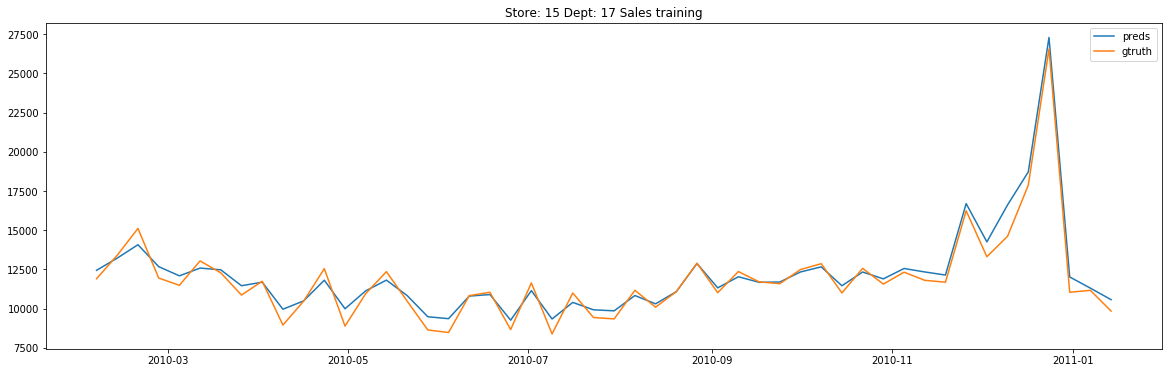

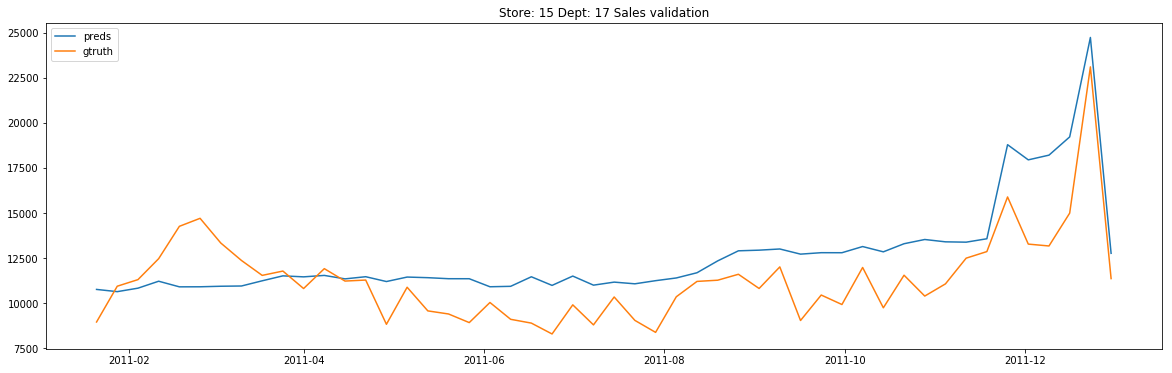

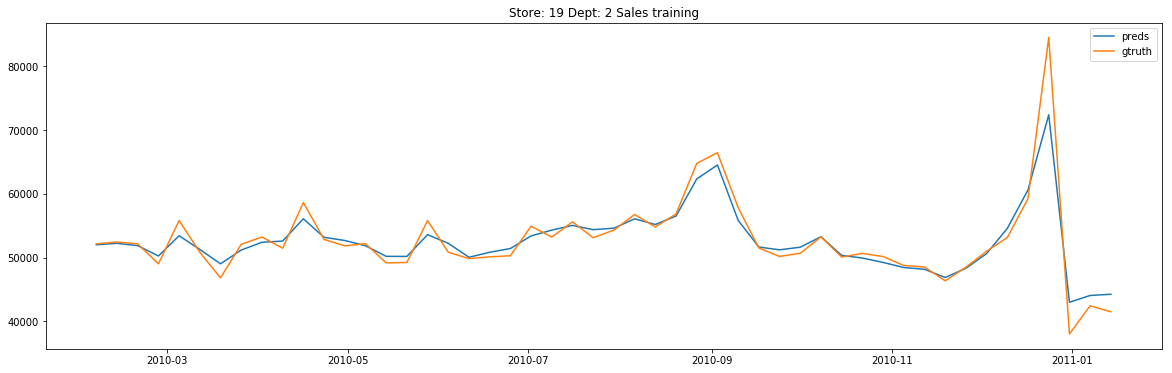

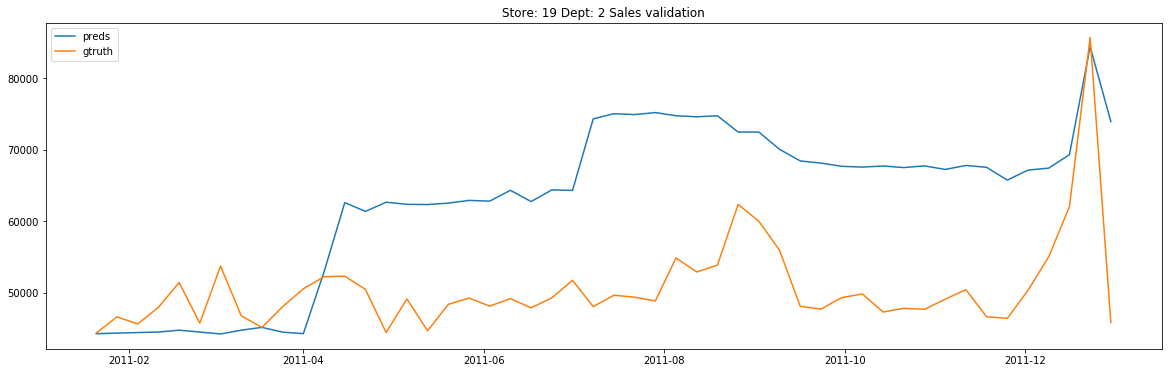

In [25]:
for i in range(1,3):
    store = np.random.randint(1, 20)
    dept = np.random.randint(1, 20)
    plot_sales(report_df,store,dept, False, 'training')
    plot_sales(valid_df,store,dept, False, 'validation')

# Comparison of imporance Markdowns when there is no time information

#### Two model is created: model_with will be trained and tested with markdown features, model_without will be trained and tested without markdown features

In [26]:
model_with = RandomForestRegressor(n_estimators=20, criterion='mse')
model_without = RandomForestRegressor(n_estimators=20, criterion='mse')

#### Prediction column (Weekly_Sales) and unneccessary column 'IsHoliday' is removed.

##### IsHoliday info now is being kept in markdown columns.

#### Week is also removed in order to remove time information.

In [27]:
features = list(final_train_df.columns)
features.remove('Weekly_Sales')
features.remove('IsHoliday')
features.remove('Week')

#### Data is splitted into two parts.

In [28]:
split_indx = len(final_train_df.index.unique())*50//100
split_date = final_train_df.index.unique()[split_indx]

training = final_train_df.index < split_date
X = final_train_df[features][training]
y = final_train_df['Weekly_Sales'][training]

validation = final_train_df.index >= split_date
X_test = final_train_df[features][validation]
y_test = y_test = final_train_df['Weekly_Sales'][validation]

#### Model with markdown is fitted and tested with training and validation data. It's error is reported.

In [29]:
model_with.fit(X, y, isholiday_ind[training]*4 + 1)

pred_train = model_with.predict(X)
pred_test = model_with.predict(X_test)

training_with = mse(y, pred_train)
test_with = mse(y_test, pred_test)

print('training error: {} \ntest error: {}'.format(training_with, test_with))

training error: 2228.269945839806 
test error: 9011.459891541079


#### Markdown features are deleted.

In [30]:
features.remove('m1_christ')
features.remove('m2_thanks')
features.remove('m3_labor')
features.remove('m4_super')

#### Data is splitted into two parts.

In [31]:
split_indx = len(final_train_df.index.unique())*50//100
split_date = final_train_df.index.unique()[split_indx]

training = final_train_df.index < split_date
X = final_train_df[features][training]
y = final_train_df['Weekly_Sales'][training]

validation = final_train_df.index >= split_date
X_test = final_train_df[features][validation]
y_test = y_test = final_train_df['Weekly_Sales'][validation]

#### Model without markdown is fitted and tested with training and validation data. It's error is reported.

In [32]:
model_without.fit(X, y, isholiday_ind[training]*4 + 1)

pred_train = model_without.predict(X)
pred_test = model_without.predict(X_test)

training_without = mse(y, pred_train)
test_without = mse(y_test, pred_test)

print('training error: {} \ntest error: {}'.format(training_without, test_without))

training error: 2412.4361836944377 
test error: 15518.976415035895


#### Result

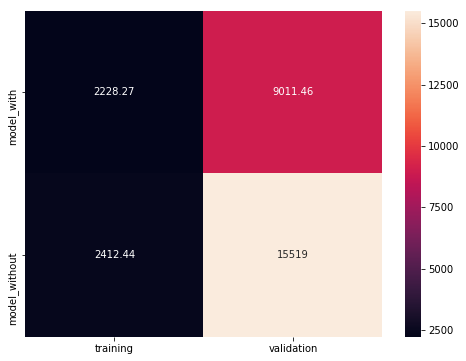

In [33]:
error_matrix = np.array([[training_with, test_with], [training_without, test_without]])

plt.figure(figsize=(8,6))
sns.heatmap(error_matrix, annot=True, fmt='g',
            xticklabels=['training', 'validation'],
            yticklabels=['model_with', 'model_without']);


#### Even though there is a small difference in training error, the effect of markdown features can be observed in validation error difference

# Finalizing training and creating a model for test data

In [34]:
features = list(final_train_df.columns)

features.remove('Weekly_Sales')
features.remove('IsHoliday')

In [35]:
X = final_train_df[features]
y = final_train_df['Weekly_Sales']

final_model = RandomForestRegressor(n_estimators=20, criterion='mse')
final_model.fit(X, y, isholiday_ind*4 + 1)

preds = model.predict(X)
training_error = mse(y, preds)

print('training error', training_error)

training error 4300.608100023649


In [36]:
pred_df = pd.DataFrame({'Preds':preds})
pred_df = pred_df.set_index(X.index)
final_df = pd.concat([X, y, pred_df], axis=1)
final_df.head()

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week,Weekly_Sales,Preds
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,24924.50,24953.6505
2010-02-05,1,2,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,50605.27,48652.2416
2010-02-05,1,3,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,13740.12,13226.9573
2010-02-05,1,4,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,39954.04,38494.1251
2010-02-05,1,5,42.31,2.572,211.096358,8.106,0,151315,0,0,0,0,5,32229.38,30438.8315


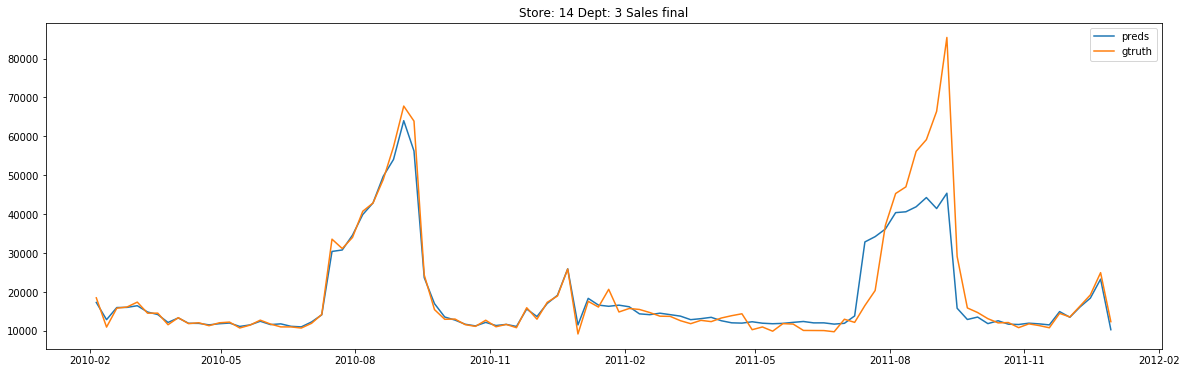

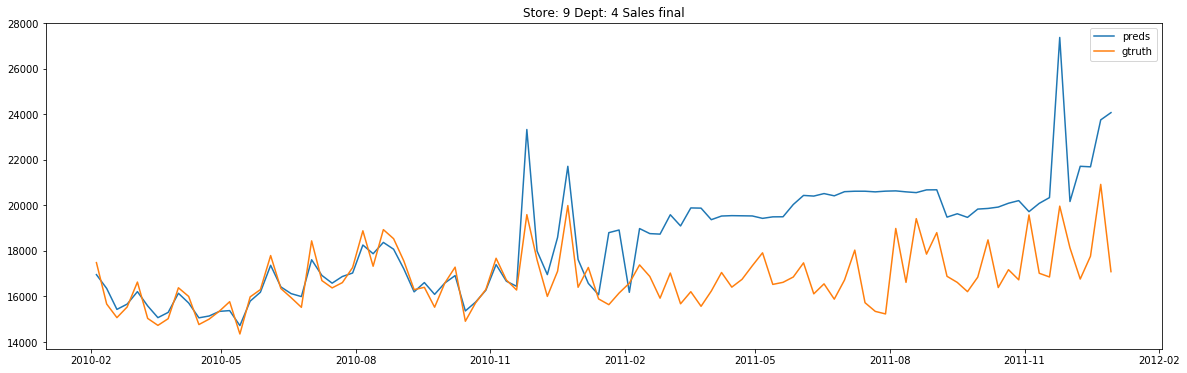

In [47]:
for i in range(1,3):
    store = np.random.randint(1, 20)
    dept = np.random.randint(1, 10)
    plot_sales(final_df,store,dept,False,'final')

# Preparing test data for prediction.

In [38]:
test_df = pd.read_csv(DATA_DIR + 'test.csv')
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-01-06,False
1,1,1,2012-01-13,False
2,1,1,2012-01-20,False
3,1,1,2012-01-27,False
4,1,1,2012-02-03,False


In [39]:
merged_test_df = pd.merge(test_df, merged_df, on=['Store', 'Date', 'IsHoliday'])

merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'], format="%Y-%m-%d")
merged_test_df['IsHoliday'] = merged_test_df['IsHoliday']*1

types = merged_test_df.Type.unique()
encoded_type = {}
for ind, typ in enumerate(types):
    encoded_type[typ] = ind
    
merged_test_df['Type'] = merged_test_df['Type'].map(encoded_type)
merged_test_df = merged_test_df.set_index('Date')

print('{} rows are duplicated in {} rows'.format(merged_test_df.duplicated().sum(), merged_test_df.shape[0]))

merged_test_df.head()

0 rows are duplicated in 127438 rows


,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-01-06,1,1,0,49.01,3.157,219.714258,7.348,0,151315
2012-01-06,1,2,0,49.01,3.157,219.714258,7.348,0,151315
2012-01-06,1,3,0,49.01,3.157,219.714258,7.348,0,151315
2012-01-06,1,4,0,49.01,3.157,219.714258,7.348,0,151315
2012-01-06,1,5,0,49.01,3.157,219.714258,7.348,0,151315


In [40]:
data_check_df = pd.DataFrame(merged_train_df.dtypes).T
data_check_df = data_check_df.rename({0:'data type'})
isanyna = pd.DataFrame(merged_train_df.isna().sum()).T
data_check_df = data_check_df.append(isanyna)
data_check_df = data_check_df.rename({0:'number of NaNs'})
data_check_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
data type,int64,int64,float64,int32,float64,float64,float64,float64,int64,int64
number of NaNs,0,0,0,0,0,0,0,0,0,0


In [41]:
isholiday_ind = merged_test_df['IsHoliday'] == 1

christmas = np.logical_and(merged_test_df.index.month == 12, isholiday_ind)
thanksgiving = np.logical_and(merged_test_df.index.month == 11, isholiday_ind)
labor = np.logical_and(merged_test_df.index.month == 9, isholiday_ind)
superbowl = np.logical_and(merged_test_df.index.month == 2, isholiday_ind)

markdown_df = pd.DataFrame({'m1_christ':christmas, 'm2_thanks':thanksgiving, 'm3_labor':labor, 'm4_super':superbowl},dtype=int)
markdown_df = markdown_df.set_index(merged_test_df.index)

week_df  = pd.DataFrame({'Week':merged_test_df.index.week})
week_df = week_df.set_index(merged_test_df.index)

final_test_df = pd.concat([merged_test_df, markdown_df, week_df], axis=1)

In [42]:
final_test_df.describe()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week
count,127438.000000,127438.000000,127438.000000,127438.000000,127438.000000,127438.000000,127438.000000,127438.000000,127438.000000,127438.0,127438.0,127438.000000,127438.000000,127438.000000
mean,22.247556,44.436149,0.046823,62.815807,3.710378,175.061958,7.332047,0.593724,136354.752162,0.0,0.0,0.023274,0.023549,21.980822
std,12.797050,30.634140,0.211260,16.962809,0.274979,40.454797,1.699974,0.668884,61123.675582,0.0,0.0,0.150773,0.151639,12.418964
min,1.000000,1.000000,0.000000,7.460000,3.031000,130.157516,3.879000,0.000000,34875.000000,0.0,0.0,0.000000,0.000000,1.000000
25%,11.000000,18.000000,0.000000,51.490000,3.551000,136.959839,6.195000,0.000000,93638.000000,0.0,0.0,0.000000,0.000000,11.000000
50%,22.000000,37.000000,0.000000,64.920000,3.721000,189.842483,7.147000,0.000000,140167.000000,0.0,0.0,0.000000,0.000000,22.000000
75%,33.000000,74.000000,0.000000,76.040000,3.891000,220.486689,8.253000,1.000000,202505.000000,0.0,0.0,0.000000,0.000000,33.000000
max,45.000000,99.000000,1.000000,100.070000,4.468000,227.232807,12.187000,2.000000,219622.000000,0.0,0.0,1.000000,1.000000,43.000000


# Test prediction

In [43]:
features = list(final_test_df.columns)
features.remove('IsHoliday')

In [44]:
test = final_test_df[features]

preds = model.predict(test)

In [45]:
pred_df = pd.DataFrame({'Preds':preds})
pred_df = pred_df.set_index(final_test_df.index)
test_df = pd.concat([final_test_df, pred_df], axis=1)
test_df.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,m1_christ,m2_thanks,m3_labor,m4_super,Week,Preds
Date,,,,,,,,,,,,,,,
2012-01-06,1,1,0,49.01,3.157,219.714258,7.348,0,151315,0,0,0,0,1,19081.3450
2012-01-06,1,2,0,49.01,3.157,219.714258,7.348,0,151315,0,0,0,0,1,39646.2487
2012-01-06,1,3,0,49.01,3.157,219.714258,7.348,0,151315,0,0,0,0,1,14379.0631
2012-01-06,1,4,0,49.01,3.157,219.714258,7.348,0,151315,0,0,0,0,1,34795.3870
2012-01-06,1,5,0,49.01,3.157,219.714258,7.348,0,151315,0,0,0,0,1,26156.6336


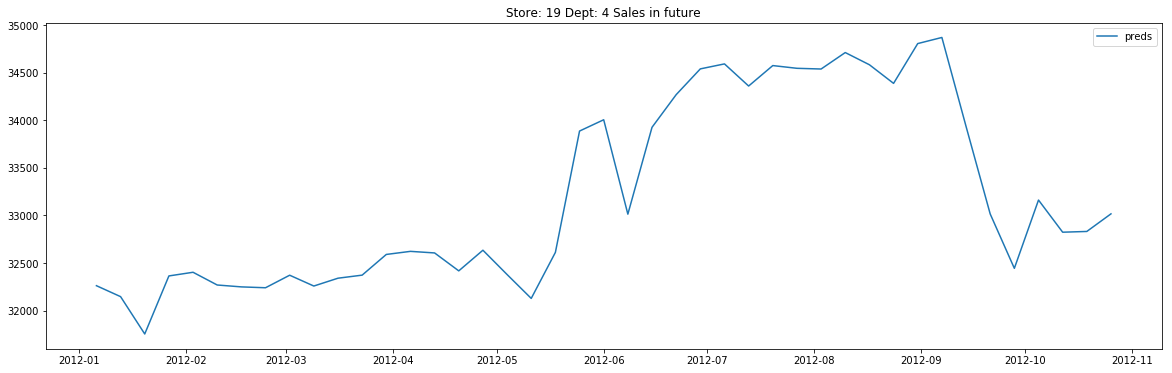

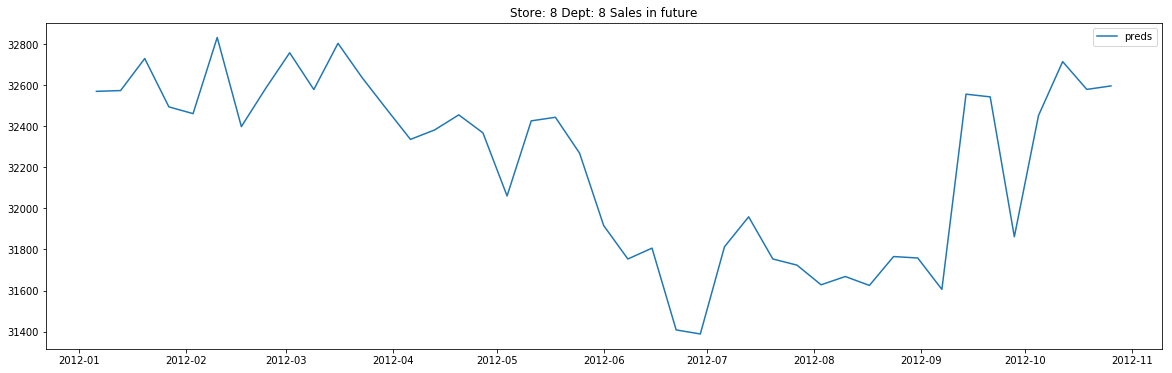

In [46]:
for i in range(1,3):
    store = np.random.randint(1, 20)
    dept = np.random.randint(1, 10)
    plot_sales(test_df,store,dept,test=True,tag='in future')